# ***`2.4 Probando diferentes kernels`***


 Kernel: linear
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



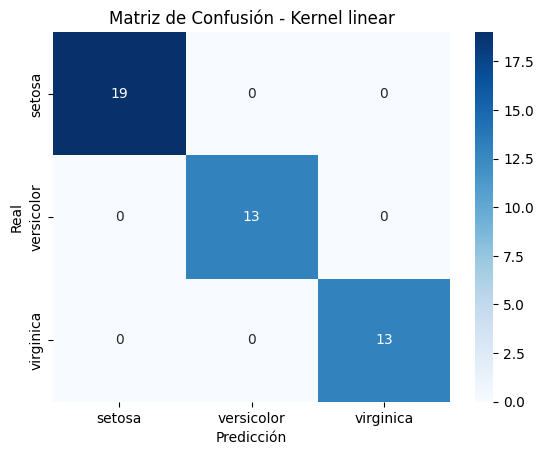


 Kernel: poly
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



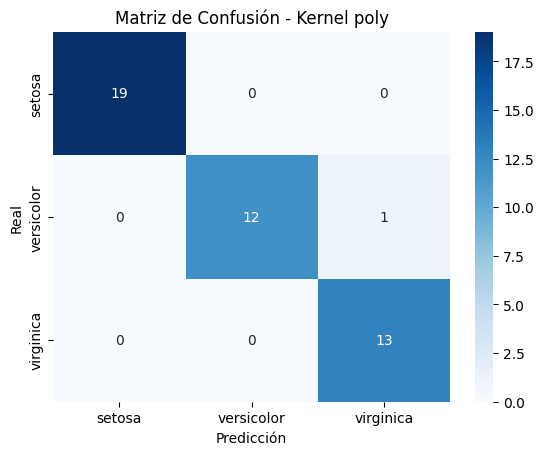


 Kernel: rbf
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



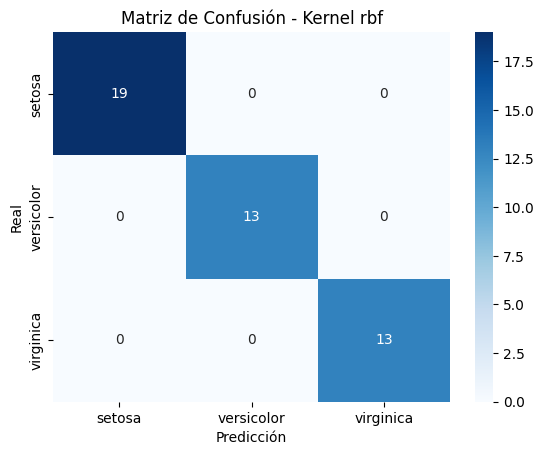


 Mejor modelo RBF: {'C': 1, 'gamma': 0.1} con accuracy: 0.9523809523809523


In [3]:
# Análisis del dataset Iris con SVM
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# 1. Cargar datos y dividir en train/test (70/30)
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Definir kernels a probar
kernels = ['linear', 'poly', 'rbf']

for k in kernels:
    print(f"\n Kernel: {k}")
    modelo = SVC(kernel=k)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    # 3. Reporte de métricas
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

    # 4. Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f"Matriz de Confusión - Kernel {k}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

# 5. Tuning de hiperparámetros (ejemplo con RBF)
param_grid = {'C':[0.1,1,10], 'gamma':[0.01,0.1,1]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("\n Mejor modelo RBF:", grid.best_params_, "con accuracy:", grid.best_score_)
